https://github.com/iolucas/dlnd-projects/blob/master/image-classification/dlnd_image_classification.ipynb

In [1]:
import math
import tensorflow as tf
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline
import os
from collections import Counter

from sklearn.model_selection import train_test_split

from data_manager import load_dataset

import json

import psycopg2

In [2]:
class Database:
    def __init__(self):
        try:
            self.conn = psycopg2.connect("dbname='postgres' user='postgres' host='localhost' password='lucas'")
            self.cur = self.conn.cursor()
        except Exception as e:
            print("I am unable to connect to the database")
            print(e)
            
    def query(self, query_str):
        #"""SELECT * from samples LIMIT 100 OFFSET 3000"""
        self.cur.execute(query_str)
        rows = self.cur.fetchall()
        self.conn.commit()
        return rows
    
    #def 

In [3]:
210454*0.2

42090.8

In [4]:
get indexes and query with them and check how much time it takes
or try to random query something and ensure no repating data points is returned


maybe we can just keep querying stuff to generate batches
use style of dlnd image classification batches, try to not create file batches, use the db instead

SyntaxError: invalid syntax (<ipython-input-4-b94b011dd313>, line 1)

In [229]:
class StrokesDataset:
    def __init__(self):
        #Connect to db
        self.conn = psycopg2.connect("dbname='postgres' user='postgres' host='localhost' password='lucas'")
        self.cur = self.conn.cursor()
        
        #Retrieve and cache ids list
        self.cur.execute("SELECT id FROM samples LIMIT 300000")
        id_list = self.cur.fetchall()
        self.id_cache = [id_value[0] for id_value in id_list]
        
        #Retrieve and cache labels
        self.cur.execute("SELECT DISTINCT key FROM samples LIMIT 300000")
        self.key_list = [key_value[0] for key_value in self.cur.fetchall()]
        self.key_to_ind = dict([(key, ind) for ind, key in enumerate(self.key_list)])
        
    def get_train_valid_test_ids(self):
        train_ids, valid_ids = train_test_split(self.id_cache, test_size=0.4)
        valid_ids, test_ids = train_test_split(valid_ids, test_size=0.5)
        return tuple(train_ids), tuple(valid_ids), tuple(test_ids)
    
    def get_batches(self, ids, batch_size):
        assert batch_size < 5000
        
        self.cur.execute("SELECT key, strokes FROM samples WHERE id in {}".format(ids))
       
        while True:
            data_batch = self.cur.fetchmany(batch_size)
            if len(data_batch) == 0:
                break
                
            ziped = list(zip(*data_batch)) #Use zip to separate labels from datapoints
            
            yield ziped[1], ziped[0]        

In [230]:
ds = StrokesDataset()

In [236]:
ds.key_to_ind[ds.key_list[0]]

0

In [195]:
sets = ds.get_train_valid_test_ids()

In [207]:
%time test_batch = ds.get_batches(sets[0],1000)

%time next(test_batch)
%time next(test_batch)
%time oi = next(test_batch)
#test_batch[1]

Wall time: 0 ns
Wall time: 5.23 s
Wall time: 169 ms
Wall time: 173 ms


In [213]:
oi[1]

('amssymb-OT1-_neq',
 'dsfont-OT1-_mathds{P}',
 'amssymb-OT1-_leqslant',
 'amssymb-OT1-_therefore',
 'marvosym-OT1-_MVAt',
 'wasysym-OT1-_pisces',
 'latex2e-OT1-_texttrademark',
 'amssymb-OT1-_square',
 'latex2e-OT1-_lambda',
 'latex2e-OT1-_propto',
 'latex2e-OT1-_bigcap',
 'latex2e-OT1-_succ',
 'latex2e-OT1-_diamond',
 'latex2e-OT1-_exists',
 'latex2e-OT1-_ldots',
 'latex2e-OT1-_bigcup',
 'amssymb-OT1-_gtrsim',
 'amssymb-OT1-_rightleftharpoons',
 'latex2e-OT1-_times',
 'latex2e-OT1-_int',
 'latex2e-OT1-_rightarrow',
 'amssymb-OT1-_lessdot',
 'latex2e-OT1-[',
 'latex2e-OT1-_cup',
 'gensymb-OT1-_ohm',
 'amssymb-OT1-_mathcal{A}',
 'dsfont-OT1-_mathds{C}',
 'latex2e-OT1-_prod',
 'latex2e-OT1-_surd',
 'esint-OT1-_fint',
 'dsfont-OT1-_mathds{R}',
 'marvosym-OT1-_EURdig',
 'amssymb-OT1-_mathcal{O}',
 'amssymb-OT1-_circlearrowright',
 'latex2e-OT1-_sigma',
 'amssymb-OT1-_mathfrak{S}',
 'wasysym-OT1-_ocircle',
 'latex2e-OT1-_textsterling',
 'latex2e-OT1-_circ',
 'latex2e-OT1-_notin',
 'mathdot

In [169]:
len(sets[0])

126272

In [89]:
#"""SELECT * from samples LIMIT 100 OFFSET 3000"""
db = Database()



In [90]:
db.query("""SELECT COUNT(key) from samples""")

[(210454,)]

In [98]:
import random
def gen_random_tuple(size):
    assert size < 100000
    rand_list = list()
    while len(rand_list) < size:
        rand_value = random.randint(1,50000)
        if rand_value not in rand_list:
            rand_list.append(rand_value)
        
    return tuple(rand_list)

#gen_random_tuple(1000)

In [72]:
#%time db.cur.execute("SELECT id,key,strokes FROM samples ORDER BY random() LIMIT 1")

Wall time: 270 ms


In [115]:
%time db.cur.execute("SELECT key,strokes FROM samples WHERE id IN {}".format(gen_random_tuple(5000)))

Wall time: 660 ms


In [116]:
%time keys = db.cur.fetchall()

Wall time: 960 ms


In [117]:
len(keys)

3358

In [79]:
keys_counter = Counter([k[0] for k in keys])

In [80]:
keys[:1000]

[(1,)]

In [65]:
len(keys_counter)

210454

In [12]:
%time testset = db.cur.fetchmany(21000)
testset

Wall time: 0 ns


[]

In [66]:
print("{}".format((1,2)))

(1, 2)


In [70]:
tuple(range(1,31))

(1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30)

In [71]:
%time dataset = db.query("SELECT id, key,strokes FROM samples WHERE id IN {}".format(tuple(range(1,31))))

Wall time: 17 ms


In [72]:
print(len(dataset))
dataset


26


[(1,
  'latex2e-OT1-_textless',
  [[[250, 103, 1362942716695],
    [242, 103, 1362942716985],
    [237, 103, 1362942717001],
    [231, 104, 1362942717018],
    [225, 107, 1362942717036],
    [220, 108, 1362942717052],
    [210, 112, 1362942717068],
    [200, 116, 1362942717086],
    [191, 120, 1362942717102],
    [183, 125, 1362942717118],
    [174, 130, 1362942717135],
    [166, 135, 1362942717151],
    [157, 140, 1362942717168],
    [147, 143, 1362942717185],
    [139, 149, 1362942717202],
    [133, 152, 1362942717218],
    [127, 155, 1362942717234],
    [120, 159, 1362942717252],
    [116, 161, 1362942717268],
    [112, 163, 1362942717285],
    [109, 164, 1362942717302],
    [106, 166, 1362942717318],
    [104, 168, 1362942717334],
    [100, 169, 1362942717351],
    [98, 170, 1362942717368],
    [96, 171, 1362942717384],
    [94, 172, 1362942717400],
    [92, 173, 1362942717417],
    [91, 174, 1362942717435],
    [90, 174, 1362942717450],
    [90, 175, 1362942717468],
    [90, 176, 

In [2]:
imgs, labels, int2sym = load_dataset(10)

2


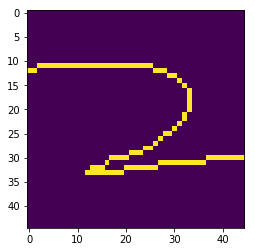

In [4]:
test_ind = 90000
plt.imshow(imgs[test_ind])
print(int2sym[labels[test_ind]])

In [5]:
tf.reset_default_graph()

n_symbols = 82

inputs = tf.placeholder(tf.float32, shape=[None, 45,45])
inputs_flatten = tf.reshape(inputs, shape=[-1,45*45])
targets = tf.placeholder(tf.int32, shape=[None])

targets_onehot = tf.one_hot(targets, n_symbols)

#h1 = tf.layers.dense(inputs_flatten, 3000, activation=tf.nn.relu)
h2 = tf.layers.dense(inputs_flatten, 1000, activation=tf.nn.relu)
h3 = tf.layers.dense(h2, 500, activation=tf.nn.relu)
logits = tf.layers.dense(h3, n_symbols)
output = tf.nn.softmax(logits)

sc = tf.nn.softmax_cross_entropy_with_logits(labels=targets_onehot, logits=logits)

cost = tf.reduce_mean(sc)

optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(targets_onehot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [8]:
#dir(conn)

In [102]:
os.listdir("../detexify data")

['detexify.sql', 'detexify.sql.gz', 'README.txt', 'symbols.json']

In [139]:
symbols = json.load(open("../detexify data/symbols.json"))
symbols_dict = dict([(sym['id'],sym['command']) for sym in symbols])

In [150]:
from IPython.display import display, Math, Latex
a = symbols_dict['latex2e-OT1-_textasciicircum']
display(Latex(a))

<IPython.core.display.Latex object>

In [137]:
%%latex

$$\rightleftharpoons$$

<IPython.core.display.Latex object>

In [138]:
symbols

[{'command': '\\textasciicircum',
  'css_class': 'symbol0fc0a6460b919255cae7741740fcfcdb',
  'id': 'latex2e-OT1-_textasciicircum',
  'mathmode': False,
  'textmode': True},
 {'command': '\\textless',
  'css_class': 'symbol8d5aed0bf13f89286d7d600bd3b6f998',
  'id': 'latex2e-OT1-_textless',
  'mathmode': False,
  'textmode': True},
 {'command': '\\textasciitilde',
  'css_class': 'symbol46c29390c9cf916a34a9748ecb44b59e',
  'id': 'latex2e-OT1-_textasciitilde',
  'mathmode': False,
  'textmode': True},
 {'command': '\\textordfeminine',
  'css_class': 'symbol9622c859e6bcde47476d601346929164',
  'id': 'latex2e-OT1-_textordfeminine',
  'mathmode': False,
  'textmode': True},
 {'command': '\\textasteriskcentered',
  'css_class': 'symbol64973858a2e540a38ac594805ae83cd8',
  'id': 'latex2e-OT1-_textasteriskcentered',
  'mathmode': False,
  'textmode': True},
 {'command': '\\textordmasculine',
  'css_class': 'symbol970176e9a7af129519e6cbda104b6937',
  'id': 'latex2e-OT1-_textordmasculine',
  'mathm

<style>
h2:after {
    content: '\\texthtc';
}
</style> <h2></h2>

In [115]:
from IPython.core.display import display, HTML
display(HTML(' <style>
h2:after {
    content: ' \00A7';
}
</style> <h2></h2>'))

SyntaxError: EOL while scanning string literal (<ipython-input-115-0a2445698c59>, line 2)

In [96]:
def gen_tuples(strokes_list):
    strokes_tuples = list()
    for x,y,t in strokes_list:
        strokes_tuples.append((x,y))

    return strokes_tuples

In [97]:
def draw_image(strokes):
    im = Image.new(mode="1", size=(500,500))

    draw = ImageDraw.Draw(im)
    #draw.moveTo(strokes[0][:2], fill=128)
    #print(strokes)
    #draw.line((0, 0) + im.size, fill=128)
    #draw.line((0, im.size[1], im.size[0], 0), fill=128)
    draw.line(strokes, fill=128, width=5)
    
    
    #for stroke in strokes[0:]:
        #print(stroke.tolist())
        #draw.line(stroke, fill=128, width=10)

    plt.imshow(im)

# write to stdout
#im.save(sys.stdout, "PNG")

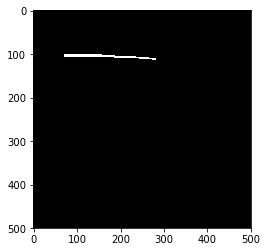

In [127]:
#gen_tuples(rows[0][2][0])
draw_image(gen_tuples(rows[57][2][0]))
#draw_image([[0,0], [100,0], (0,100)])

In [122]:
rows[1]

(8250,
 'latex2e-OT1-_delta',
 [[[232, 93, 1315344284739],
   [232, 92, 1315344284924],
   [232, 91, 1315344284957],
   [231, 90, 1315344284982],
   [229, 88, 1315344284997],
   [224, 81, 1315344285031],
   [217, 74, 1315344285064],
   [207, 68, 1315344285097],
   [197, 65, 1315344285132],
   [186, 63, 1315344285164],
   [182, 63, 1315344285216],
   [174, 63, 1315344285249],
   [170, 66, 1315344285282],
   [167, 72, 1315344285315],
   [166, 78, 1315344285349],
   [166, 87, 1315344285382],
   [172, 97, 1315344285416],
   [179, 105, 1315344285450],
   [191, 121, 1315344285484],
   [203, 133, 1315344285517],
   [214, 148, 1315344285551],
   [220, 158, 1315344285584],
   [225, 165, 1315344285617],
   [227, 170, 1315344285649],
   [227, 176, 1315344285685],
   [227, 183, 1315344285718],
   [226, 187, 1315344285752],
   [224, 191, 1315344285785],
   [220, 196, 1315344285819],
   [212, 199, 1315344285852],
   [202, 201, 1315344285886],
   [192, 202, 1315344285919],
   [181, 203, 1315344285953